In [113]:
import numpy as np
import pandas as pd
import scipy
import torch


Full Batch Gradient descent

In [114]:
num_samples = 40
np.random.seed(45) 
    
# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps
print(x1.shape,y.shape)

(40,) (40,)


In [115]:
theta=torch.randn((2,1),requires_grad=True)

x=torch.tensor(x1,dtype=torch.float32).view(-1, 1)
x=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
y =torch.tensor(y, dtype=torch.float32).view(-1, 1)
theta_hist=[]
loss_hist=[]
learning_rate=0.005
Epoch=0
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    y_pred=torch.matmul(x,theta)
    loss=torch.mean((y-y_pred)**2)
    loss_hist.append(loss.clone().detach().item())
    loss.backward()
    with torch.no_grad():
        theta-=learning_rate*theta.grad
        theta.grad.zero_()
        if(abs(theta_old[0]-theta[0])<0.001 and abs(theta_old[1]-theta[1])<0.001):
            break;
    print(f"Step {Epoch}, theta:\n", theta)
print(Epoch) 
print(loss_hist)

Step 1, theta:
 tensor([[ -1.5636],
        [126.2605]], requires_grad=True)
Step 2, theta:
 tensor([[-1.0934],
        [93.0211]], requires_grad=True)
Step 3, theta:
 tensor([[ -1.1909],
        [101.7833]], requires_grad=True)
Step 4, theta:
 tensor([[-1.1390],
        [99.4740]], requires_grad=True)
Step 5, theta:
 tensor([[ -1.1268],
        [100.0831]], requires_grad=True)
Step 6, theta:
 tensor([[-1.1043],
        [99.9229]], requires_grad=True)
Step 7, theta:
 tensor([[-1.0848],
        [99.9654]], requires_grad=True)
Step 8, theta:
 tensor([[-1.0648],
        [99.9546]], requires_grad=True)
Step 9, theta:
 tensor([[-1.0451],
        [99.9578]], requires_grad=True)
Step 10, theta:
 tensor([[-1.0256],
        [99.9573]], requires_grad=True)
Step 11, theta:
 tensor([[-1.0063],
        [99.9577]], requires_grad=True)
Step 12, theta:
 tensor([[-0.9872],
        [99.9579]], requires_grad=True)
Step 13, theta:
 tensor([[-0.9682],
        [99.9582]], requires_grad=True)
Step 14, theta:

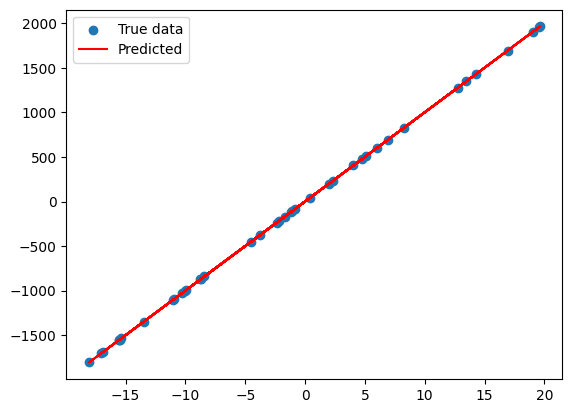

In [116]:
import matplotlib.pyplot as plt

y_pred = x @ theta

plt.scatter(x[:,1].numpy(), y.numpy(), label='True data')  # x[:,1] is original feature
plt.plot(x[:,1].numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()


In [117]:
loss=torch.mean((y-x@theta)**2)
print(loss.item())

0.605694591999054


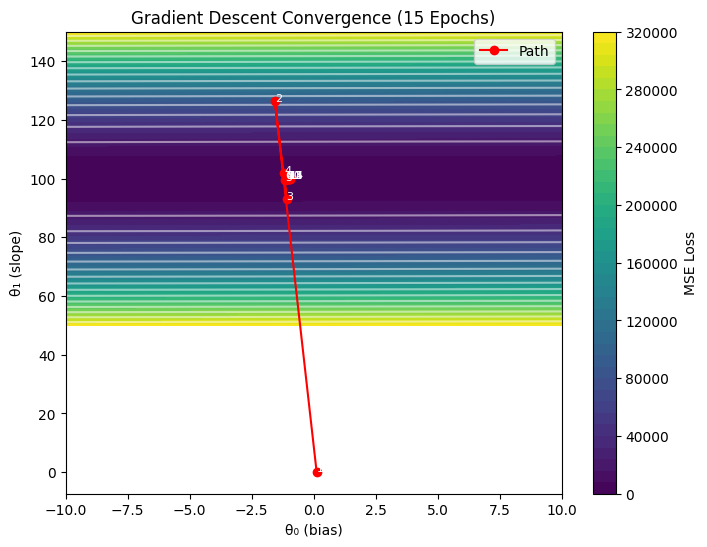

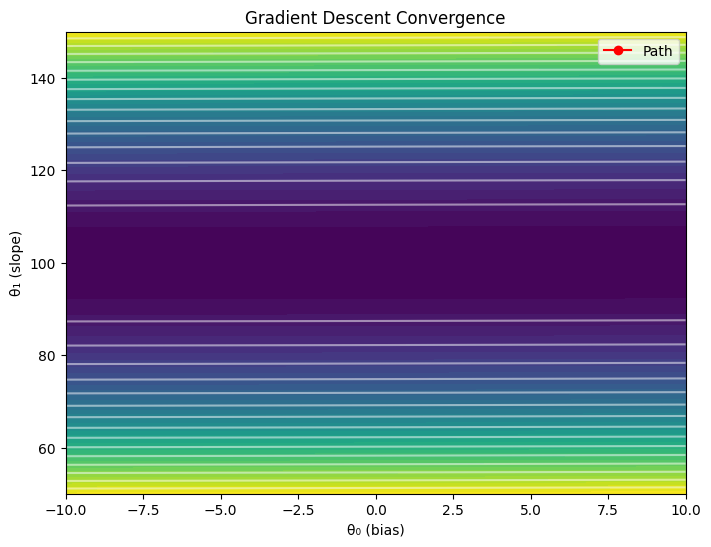

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def visualize_convergence(x, y, theta_hist, animate=False):
    """
    Visualize gradient descent convergence over the first 15 epochs.

    Parameters:
    - x : numpy array of shape (n_samples, 2)  # with bias column
    - y : numpy array of shape (n_samples, 1)
    - theta_hist : list/array of parameter vectors (θ0, θ1)
    - animate : bool, if True makes an animation, else static plot
    """

    # Take only first 15 steps
    theta_hist = np.array(theta_hist[:15])

    # Create parameter grid
    t0_vals = np.linspace(-10, 10, 200)
    t1_vals = np.linspace(50, 150, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    # Compute loss surface
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i, j], T1[i, j]])
            y_pred = x @ th.reshape(-1, 1)
            Z[i, j] = np.mean((y - y_pred) ** 2)

    if not animate:
        # Static contour plot
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        # Plot path
        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for i, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(i+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        # Animated version
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=500, blit=True)
        plt.show()
        return ani
# assuming you already have theta_hist, x, y
visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=False)  # static
# or
ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
# ani.save("gd_convergence_1.gif", writer="pillow")  # save GIF



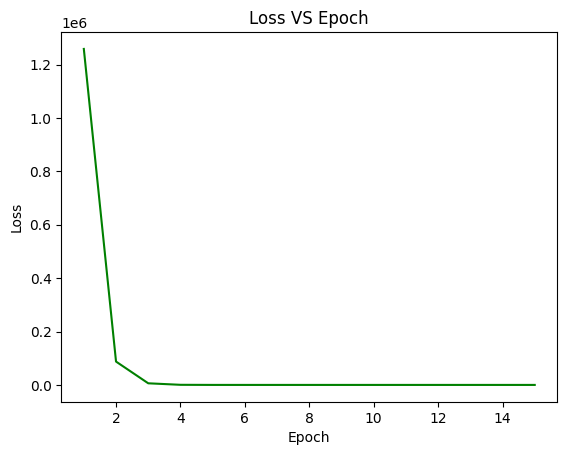

In [119]:
Epoch_hist=np.array([i for i in range(1,16)])
plt.plot(Epoch_hist,loss_hist[0:15],color='g')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.show()

In [120]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [121]:
theta=torch.randn((2,1),requires_grad=True)

x=torch.tensor(x1,dtype=torch.float32).view(-1, 1)
x=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
y =torch.tensor(y, dtype=torch.float32).view(-1, 1)
theta_hist=[]
loss_hist=[]
learning_rate=0.005
Epoch=0
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    y_pred=torch.matmul(x,theta)
    loss=torch.mean((y-y_pred)**2)
    loss_hist.append(loss.clone().detach().item())
    loss.backward()
    with torch.no_grad():
        theta-=learning_rate*theta.grad
        theta.grad.zero_()
        if(abs(theta_old[0]-theta[0])<0.001 and abs(theta_old[1]-theta[1])<0.001):
            break;
    print(f"Step {Epoch}, theta:\n", theta)
print(Epoch) 
print(loss_hist)

Step 1, theta:
 tensor([[1.9563],
        [1.5229]], requires_grad=True)
Step 2, theta:
 tensor([[1.9753],
        [1.5249]], requires_grad=True)
Step 3, theta:
 tensor([[1.9941],
        [1.5269]], requires_grad=True)
Step 4, theta:
 tensor([[2.0127],
        [1.5289]], requires_grad=True)
Step 5, theta:
 tensor([[2.0311],
        [1.5309]], requires_grad=True)
Step 6, theta:
 tensor([[2.0493],
        [1.5329]], requires_grad=True)
Step 7, theta:
 tensor([[2.0673],
        [1.5349]], requires_grad=True)
Step 8, theta:
 tensor([[2.0852],
        [1.5369]], requires_grad=True)
Step 9, theta:
 tensor([[2.1029],
        [1.5390]], requires_grad=True)
Step 10, theta:
 tensor([[2.1204],
        [1.5410]], requires_grad=True)
Step 11, theta:
 tensor([[2.1377],
        [1.5431]], requires_grad=True)
Step 12, theta:
 tensor([[2.1549],
        [1.5451]], requires_grad=True)
Step 13, theta:
 tensor([[2.1719],
        [1.5472]], requires_grad=True)
Step 14, theta:
 tensor([[2.1887],
        [1.5

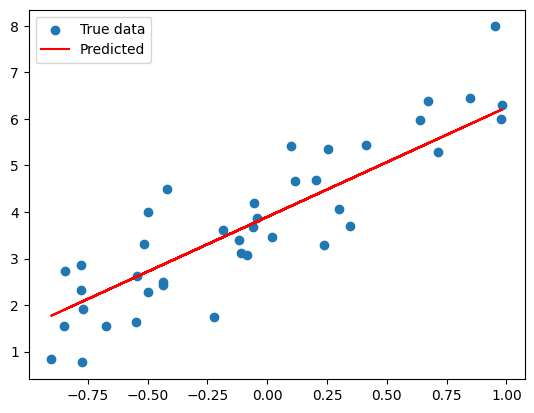

In [122]:
import matplotlib.pyplot as plt

y_pred = x @ theta

plt.scatter(x[:,1].numpy(), y.numpy(), label='True data')  # x[:,1] is original feature
plt.plot(x[:,1].numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

In [123]:
loss=torch.mean((y-x@theta)**2)
print(loss.item())

0.6302247047424316


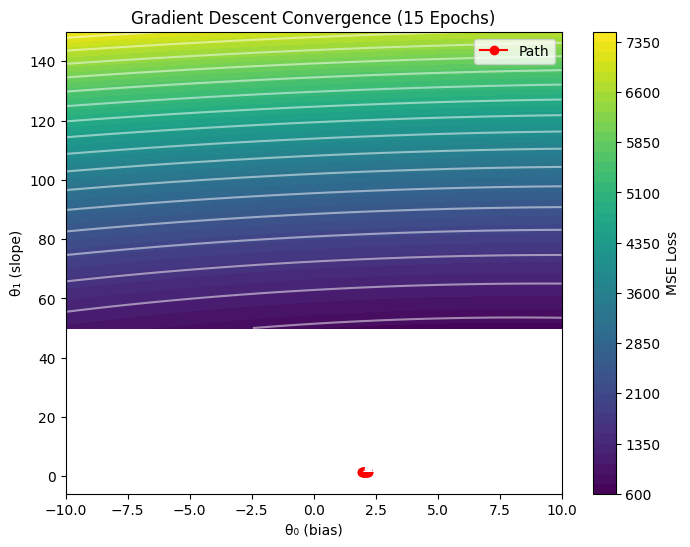

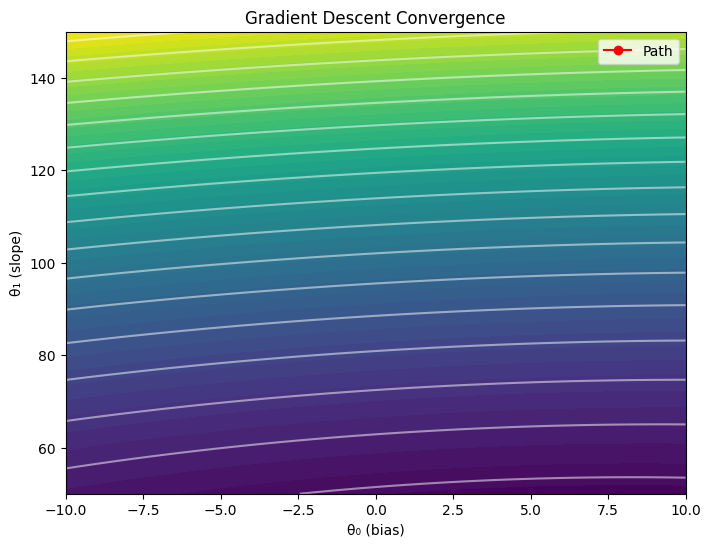

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def visualize_convergence(x, y, theta_hist, animate=False):
    """
    Visualize gradient descent convergence over the first 15 epochs.

    Parameters:
    - x : numpy array of shape (n_samples, 2)  # with bias column
    - y : numpy array of shape (n_samples, 1)
    - theta_hist : list/array of parameter vectors (θ0, θ1)
    - animate : bool, if True makes an animation, else static plot
    """

    # Take only first 15 steps
    theta_hist = np.array(theta_hist[:15])

    # Create parameter grid
    t0_vals = np.linspace(-10, 10, 200)
    t1_vals = np.linspace(50, 150, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    # Compute loss surface
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i, j], T1[i, j]])
            y_pred = x @ th.reshape(-1, 1)
            Z[i, j] = np.mean((y - y_pred) ** 2)

    if not animate:
        # Static contour plot
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        # Plot path
        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for i, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(i+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        # Animated version
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=500, blit=True)
        plt.show()
        return ani
# assuming you already have theta_hist, x, y
visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=False)  # static
# or
ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
#ani.save("gd_convergence_2.gif", writer="pillow")  # save GIF



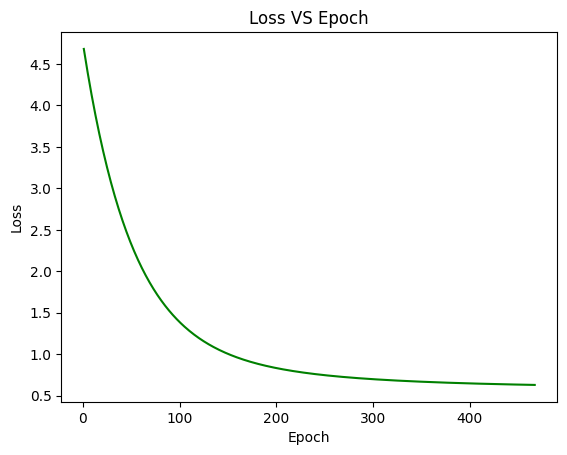

In [125]:
Epoch_hist=np.array([i for i in range(1,len(loss_hist)+1)])
plt.plot(Epoch_hist,loss_hist,color='g')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.show()

Socastic gradient Descent

In [126]:
num_samples = 40
np.random.seed(45) 
    
# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps
print(x1.shape,y.shape)

(40,) (40,)


In [127]:

theta=torch.randn((2,1),requires_grad=True)
y=torch.tensor(y,dtype=torch.float32).view(-1,1)
x=torch.tensor(x1,dtype=torch.float32).view(-1,1)
print("size:",y.shape,x.shape)
Epoch=0
theta_hist=[]
loss_hist=[]
learning_rate=0.005
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    for i in range(0,x.shape[0]):
        y_pred=theta[0]+theta[1]*(x[i])
        loss=(y[i]-y_pred)**2
        loss_hist.append(loss.clone().detach().item())
        loss.backward()
        with torch.no_grad():
            theta-=learning_rate*theta.grad
            theta.grad.zero_()
    if(abs(theta_old[0]-theta[0])<0.001 and abs(theta_old[1]-theta[1])<0.001):
            break;
    print(f"Epoch{Epoch}, theta:\n",theta)
print("Epoch:",Epoch)
        

size: torch.Size([40, 1]) torch.Size([40, 1])
Epoch1, theta:
 tensor([[ 12.1544],
        [100.2420]], requires_grad=True)
Epoch2, theta:
 tensor([[  6.6631],
        [100.1776]], requires_grad=True)
Epoch3, theta:
 tensor([[  3.8808],
        [100.1449]], requires_grad=True)
Epoch4, theta:
 tensor([[  2.4710],
        [100.1283]], requires_grad=True)
Epoch5, theta:
 tensor([[  1.7567],
        [100.1200]], requires_grad=True)
Epoch6, theta:
 tensor([[  1.3948],
        [100.1157]], requires_grad=True)
Epoch7, theta:
 tensor([[  1.2114],
        [100.1136]], requires_grad=True)
Epoch8, theta:
 tensor([[  1.1185],
        [100.1124]], requires_grad=True)
Epoch9, theta:
 tensor([[  1.0714],
        [100.1119]], requires_grad=True)
Epoch10, theta:
 tensor([[  1.0476],
        [100.1116]], requires_grad=True)
Epoch11, theta:
 tensor([[  1.0355],
        [100.1115]], requires_grad=True)
Epoch12, theta:
 tensor([[  1.0294],
        [100.1114]], requires_grad=True)
Epoch13, theta:
 tensor([[ 

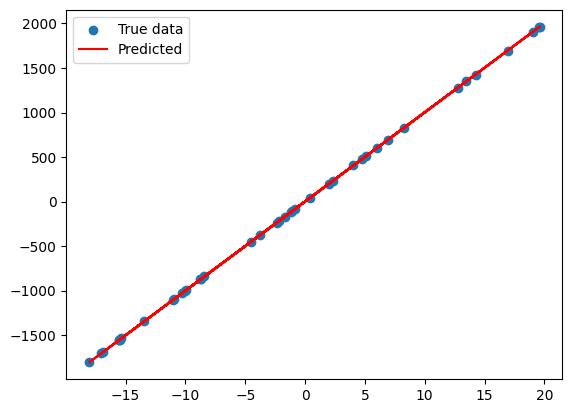

In [128]:
import matplotlib.pyplot as plt

y_pred = theta[0]+x*theta[1]

plt.scatter(x.numpy(), y.numpy(), label='True data') 
plt.plot(x.numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

In [129]:
loss=torch.mean((y-theta[0]-x*theta[1])**2)
print(loss.item())

2.6148340702056885


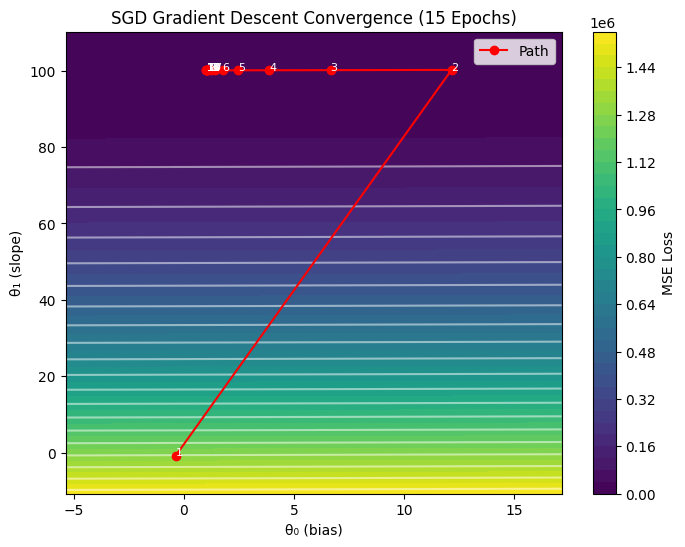

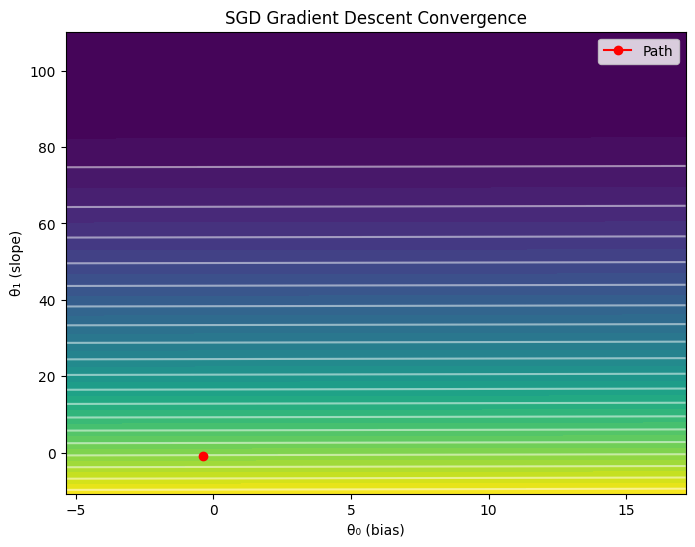

In [130]:
def visualize_convergence_sgd_1d(x, y, theta_hist, animate=False):
    theta_hist = np.array(theta_hist[:15 * len(x)])  # first 15 epochs

    # Flatten x to 1D if needed
    x = x.flatten()
    y = y.flatten()

    # Grid for contour
    t0_vals = np.linspace(np.min(theta_hist[:,0])-5, np.max(theta_hist[:,0])+5, 200)
    t1_vals = np.linspace(np.min(theta_hist[:,1])-10, np.max(theta_hist[:,1])+10, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i,j], T1[i,j]])
            y_pred = th[0] + th[1] * x
            Z[i,j] = np.mean((y - y_pred)**2)

    if not animate:
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for k, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(k+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("SGD Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("SGD Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=200, blit=True)
        plt.show()
        return ani
    # assuming you already have theta_hist, x, y
visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=False)  # ✅ static
# or
ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
#ani.save("gd_convergence_3.gif", writer="pillow")  # save GIF



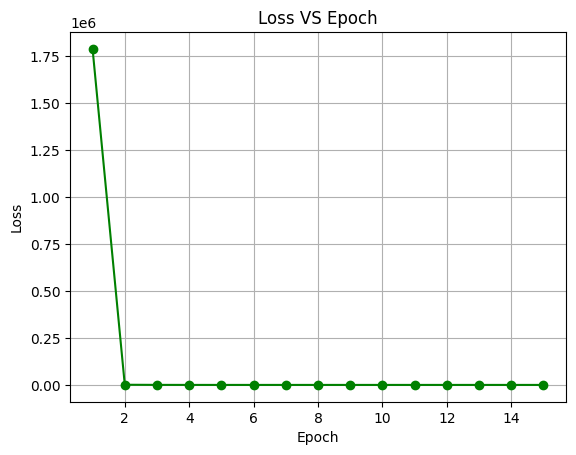

In [131]:
# Convert loss_hist to numpy
loss_hist = np.array(loss_hist)

# Number of samples per epoch
n_samples = 40

# Average loss per epoch
loss_per_epoch = [np.mean(loss_hist[i*n_samples:(i+1)*n_samples]) for i in range(int(len(loss_hist)/n_samples))]

# Epoch numbers
Epoch_hist = np.arange(1, len(loss_per_epoch)+1)

# Plot
plt.plot(Epoch_hist, loss_per_epoch, color='g', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.grid(True)
plt.show()


In [132]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [133]:

theta=torch.randn((2,1),requires_grad=True)
y=torch.tensor(y,dtype=torch.float32).view(-1,1)
x=torch.tensor(x1,dtype=torch.float32).view(-1,1)
print("size:",y.shape,x.shape)
Epoch=0
theta_hist=[]
loss_hist=[]
learning_rate=0.005
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    for i in range(0,x.shape[0]):
        y_pred=theta[0]+theta[1]*(x[i])
        loss=(y[i]-y_pred)**2
        loss_hist.append(loss.clone().detach().item())
        loss.backward()
        with torch.no_grad():
            theta-=learning_rate*theta.grad
            theta.grad.zero_()
    if(abs(theta_old[0]-theta[0])<0.001 and abs(theta_old[1]-theta[1])<0.001):
            break;
    print(f"Epoch{Epoch}, theta:\n",theta)
print("Epoch:",Epoch)
        

size: torch.Size([40, 1]) torch.Size([40, 1])
Epoch1, theta:
 tensor([[ 0.7115],
        [-0.0613]], requires_grad=True)
Epoch2, theta:
 tensor([[1.7130],
        [0.1844]], requires_grad=True)
Epoch3, theta:
 tensor([[2.3897],
        [0.4259]], requires_grad=True)
Epoch4, theta:
 tensor([[2.8490],
        [0.6556]], requires_grad=True)
Epoch5, theta:
 tensor([[3.1626],
        [0.8695]], requires_grad=True)
Epoch6, theta:
 tensor([[3.3783],
        [1.0657]], requires_grad=True)
Epoch7, theta:
 tensor([[3.5280],
        [1.2440]], requires_grad=True)
Epoch8, theta:
 tensor([[3.6330],
        [1.4048]], requires_grad=True)
Epoch9, theta:
 tensor([[3.7077],
        [1.5490]], requires_grad=True)
Epoch10, theta:
 tensor([[3.7616],
        [1.6780]], requires_grad=True)
Epoch11, theta:
 tensor([[3.8012],
        [1.7929]], requires_grad=True)
Epoch12, theta:
 tensor([[3.8309],
        [1.8952]], requires_grad=True)
Epoch13, theta:
 tensor([[3.8536],
        [1.9860]], requires_grad=True)

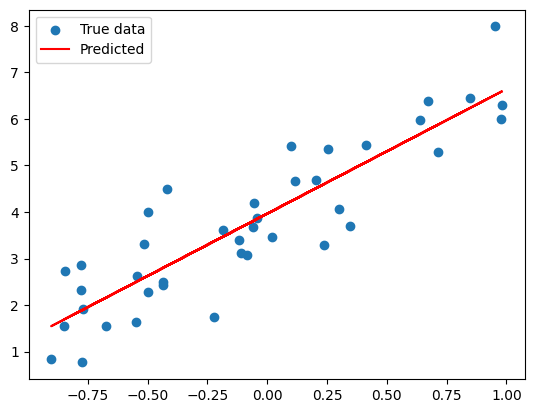

In [134]:
import matplotlib.pyplot as plt

y_pred = theta[0]+x*theta[1]

plt.scatter(x.numpy(), y.numpy(), label='True data') 
plt.plot(x.numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

In [135]:
loss=torch.mean((y-theta[0]-x*theta[1])**2)
print(loss.item())

0.5959482192993164


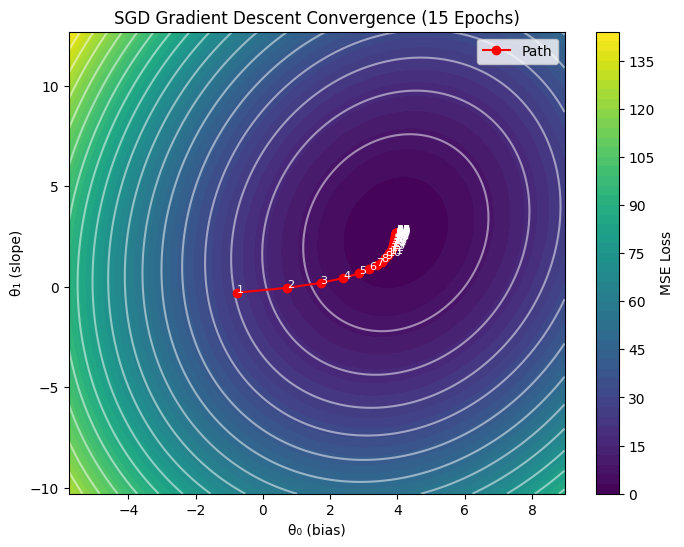

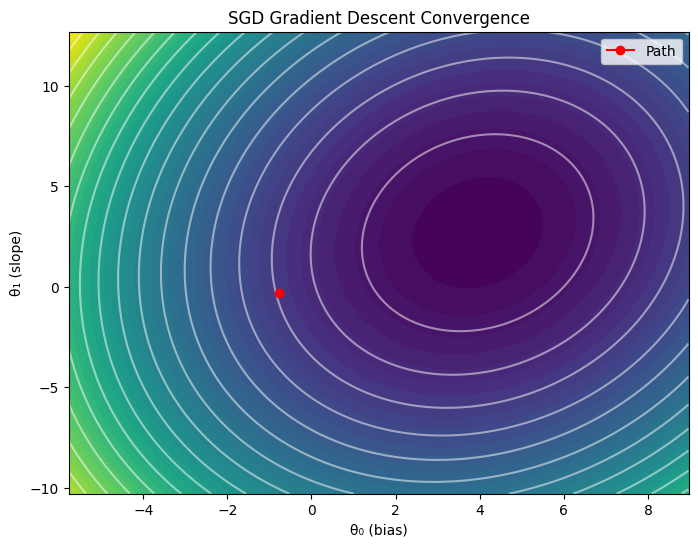

In [136]:
def visualize_convergence_sgd_1d(x, y, theta_hist, animate=False):
    theta_hist = np.array(theta_hist[:15 * len(x)])  # first 15 epochs

    # Flatten x to 1D if needed
    x = x.flatten()
    y = y.flatten()

    # Grid for contour
    t0_vals = np.linspace(np.min(theta_hist[:,0])-5, np.max(theta_hist[:,0])+5, 200)
    t1_vals = np.linspace(np.min(theta_hist[:,1])-10, np.max(theta_hist[:,1])+10, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i,j], T1[i,j]])
            y_pred = th[0] + th[1] * x
            Z[i,j] = np.mean((y - y_pred)**2)

    if not animate:
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for k, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(k+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("SGD Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("SGD Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=200, blit=True)
        plt.show()
        return ani
    # assuming you already have theta_hist, x, y
visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=False)  # ✅ static
# or
ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
#ani.save("gd_convergence_4.gif", writer="pillow")  # save GIF



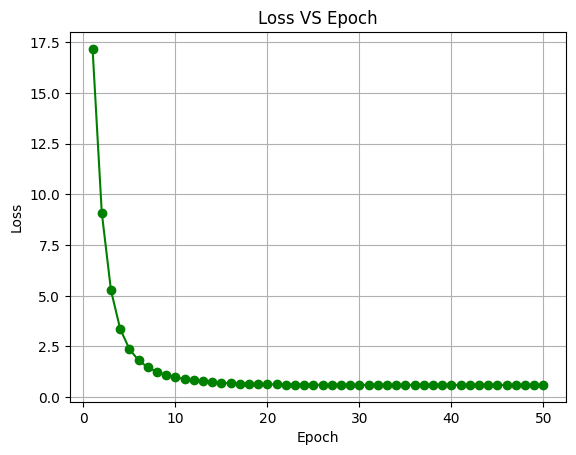

In [137]:
# Convert loss_hist to numpy
loss_hist = np.array(loss_hist)

# Number of samples per epoch
n_samples = 40

# Average loss per epoch
loss_per_epoch = [np.mean(loss_hist[i*n_samples:(i+1)*n_samples]) for i in range(int(len(loss_hist)/n_samples))]

# Epoch numbers
Epoch_hist = np.arange(1, len(loss_per_epoch)+1)

# Plot
plt.plot(Epoch_hist, loss_per_epoch, color='g', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.grid(True)
plt.show()
